En este archivo puedes escribir lo que estimes conveniente. Te recomendamos detallar tu solución y todas las suposiciones que estás considerando. Aquí puedes ejecutar las funciones que definiste en los otros archivos de la carpeta src, medir el tiempo, memoria, etc.

#### Cargar las Librarias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import emoji
import warnings
from typing import List, Tuple
from datetime import datetime
from collections import defaultdict, Counter
import re

%matplotlib inline


In [2]:
file_path = "../data/farmers-protest-tweets-2021-2-4.json"

#### 1) Leer el archivo JSON línea por línea:

In [3]:
data = []

with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error al decodificar la línea: {e}")

# Convertir los datos a un DataFrame de pandas
df = pd.json_normalize(data)

# Configurar pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Mostrar las primeras filas del dataframe
df.head()


,url,date,content,renderedContent,id,outlinks,tcooutlinks,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceUrl,sourceLabel,media,retweetedTweet,mentionedUsers,user.username,user.displayname,user.id,user.description,user.rawDescription,user.descriptionUrls,user.verified,user.created,user.followersCount,user.friendsCount,user.statusesCount,user.favouritesCount,user.listedCount,user.mediaCount,user.location,user.protected,user.linkUrl,user.linkTcourl,user.profileImageUrl,user.profileBannerUrl,user.url,quotedTweet.url,quotedTweet.date,quotedTweet.content,quotedTweet.renderedContent,quotedTweet.id,quotedTweet.user.username,quotedTweet.user.displayname,quotedTweet.user.id,quotedTweet.user.description,quotedTweet.user.rawDescription,quotedTweet.user.descriptionUrls,quotedTweet.user.verified,quotedTweet.user.created,quotedTweet.user.followersCount,quotedTweet.user.friendsCount,quotedTweet.user.statusesCount,quotedTweet.user.favouritesCount,quotedTweet.user.listedCount,quotedTweet.user.mediaCount,quotedTweet.user.location,quotedTweet.user.protected,quotedTweet.user.linkUrl,quotedTweet.user.linkTcourl,quotedTweet.user.profileImageUrl,quotedTweet.user.profileBannerUrl,quotedTweet.user.url,quotedTweet.outlinks,quotedTweet.tcooutlinks,quotedTweet.replyCount,quotedTweet.retweetCount,quotedTweet.likeCount,quotedTweet.quoteCount,quotedTweet.conversationId,quotedTweet.lang,quotedTweet.source,quotedTweet.sourceUrl,quotedTweet.sourceLabel,quotedTweet.media,quotedTweet.retweetedTweet,quotedTweet.quotedTweet,quotedTweet.mentionedUsers,quotedTweet,quotedTweet.quotedTweet.url,quotedTweet.quotedTweet.date,quotedTweet.quotedTweet.content,quotedTweet.quotedTweet.renderedContent,quotedTweet.quotedTweet.id,quotedTweet.quotedTweet.user.username,quotedTweet.quotedTweet.user.displayname,quotedTweet.quotedTweet.user.id,quotedTweet.quotedTweet.user.description,quotedTweet.quotedTweet.user.rawDescription,quotedTweet.quotedTweet.user.descriptionUrls,quotedTweet.quotedTweet.user.verified,quotedTweet.quotedTweet.user.created,quotedTweet.quotedTweet.user.followersCount,quotedTweet.quotedTweet.user.friendsCount,quotedTweet.quotedTweet.user.statusesCount,quotedTweet.quotedTweet.user.favouritesCount,quotedTweet.quotedTweet.user.listedCount,quotedTweet.quotedTweet.user.mediaCount,quotedTweet.quotedTweet.user.location,quotedTweet.quotedTweet.user.protected,quotedTweet.quotedTweet.user.linkUrl,quotedTweet.quotedTweet.user.linkTcourl,quotedTweet.quotedTweet.user.profileImageUrl,quotedTweet.quotedTweet.user.profileBannerUrl,quotedTweet.quotedTweet.user.url,quotedTweet.quotedTweet.outlinks,quotedTweet.quotedTweet.tcooutlinks,quotedTweet.quotedTweet.replyCount,quotedTweet.quotedTweet.retweetCount,quotedTweet.quotedTweet.likeCount,quotedTweet.quotedTweet.quoteCount,quotedTweet.quotedTweet.conversationId,quotedTweet.quotedTweet.lang,quotedTweet.quotedTweet.source,quotedTweet.quotedTweet.sourceUrl,quotedTweet.quotedTweet.sourceLabel,quotedTweet.quotedTweet.media,quotedTweet.quotedTweet.retweetedTweet,quotedTweet.quotedTweet.quotedTweet,quotedTweet.quotedTweet.mentionedUsers,quotedTweet.quotedTweet.quotedTweet.url,quotedTweet.quotedTweet.quotedTweet.date,quotedTweet.quotedTweet.quotedTweet.content,quotedTweet.quotedTweet.quotedTweet.renderedContent,quotedTweet.quotedTweet.quotedTweet.id,quotedTweet.quotedTweet.quotedTweet.user.username,quotedTweet.quotedTweet.quotedTweet.user.displayname,quotedTweet.quotedTweet.quotedTweet.user.id,quotedTweet.quotedTweet.quotedTweet.user.description,quotedTweet.quotedTweet.quotedTweet.user.rawDescription,quotedTweet.quotedTweet.quotedTweet.user.descriptionUrls,quotedTweet.quotedTweet.quotedTweet.user.verified,quotedTweet.quotedTweet.quotedTweet.user.created,quotedTweet.quotedTweet.quotedTweet.user.followersCount,quotedTweet.quotedTweet.quotedTweet.user.friendsCount,quotedTweet.quotedTweet.quotedTweet.user.statusesCount,quotedTweet.quotedTweet.quotedTweet.user.favouritesCount,quotedTweet.quotedTweet.quotedTweet.user.

## Análisis de la Estructura de los Datos

En esta sección, hemos cargado los datos y mostrado las primeras filas para entender la estructura general del DataFrame. A continuación, presentamos una descripción general de las columnas y sus tipos de datos.


#### 2) Validar las columnas del dataframe:

In [4]:
# Validar las columnas del DataFrame
print("Columnas del DataFrame:")
print(df.columns.tolist())

# Comprobar los tipos de datos de las columnas
print("\nTipos de datos de las columnas:")
print(df.dtypes)

Columnas del DataFrame:
['url', 'date', 'content', 'renderedContent', 'id', 'outlinks', 'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'media', 'retweetedTweet', 'mentionedUsers', 'user.username', 'user.displayname', 'user.id', 'user.description', 'user.rawDescription', 'user.descriptionUrls', 'user.verified', 'user.created', 'user.followersCount', 'user.friendsCount', 'user.statusesCount', 'user.favouritesCount', 'user.listedCount', 'user.mediaCount', 'user.location', 'user.protected', 'user.linkUrl', 'user.linkTcourl', 'user.profileImageUrl', 'user.profileBannerUrl', 'user.url', 'quotedTweet.url', 'quotedTweet.date', 'quotedTweet.content', 'quotedTweet.renderedContent', 'quotedTweet.id', 'quotedTweet.user.username', 'quotedTweet.user.displayname', 'quotedTweet.user.id', 'quotedTweet.user.description', 'quotedTweet.user.rawDescription', 'quotedTweet.user.descriptionUrls', 'quotedTweet.user.verifie

#### 3) Realizar el análisis exploratorio

In [5]:
# Información general del dataframe
print("\nInformación general del dataframe:")
df.info()

# Descripción estadística de las columnas numéricas
print("\nDescripción estadística de las columnas numéricas:")
print(df.describe())



Información general del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117407 entries, 0 to 117406
Columns: 164 entries, url to quotedTweet.quotedTweet.quotedTweet.mentionedUsers
dtypes: bool(2), float64(46), int64(13), object(103)
memory usage: 145.3+ MB

Descripción estadística de las columnas numéricas:
                 id     replyCount   retweetCount      likeCount     quoteCount  conversationId       user.id  user.followersCount  user.friendsCount  user.statusesCount  user.favouritesCount  user.listedCount  user.mediaCount  quotedTweet.id  quotedTweet.user.id  quotedTweet.user.followersCount  quotedTweet.user.friendsCount  quotedTweet.user.statusesCount  quotedTweet.user.favouritesCount  quotedTweet.user.listedCount  quotedTweet.user.mediaCount  quotedTweet.replyCount  quotedTweet.retweetCount  quotedTweet.likeCount  quotedTweet.quoteCount  quotedTweet.conversationId  quotedTweet.retweetedTweet  quotedTweet.quotedTweet  quotedTweet  quotedTweet.quotedTweet.id  quot

In [6]:
# Descripción de las columnas categóricas
def describe_categorical(df):
    result = {}
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].apply(lambda x: isinstance(x, list) if x is not None else False).any():
            # Si la columna contiene listas, contamos el número de listas no vacías
            result[col] = {
                'count': df[col].apply(lambda x: len(x) > 0 if isinstance(x, list) else False).sum(),
                'unique': 'N/A',
                'top': 'N/A',
                'freq': 'N/A'
            }
        else:
            result[col] = {
                'count': df[col].count(),
                'unique': df[col].nunique(),
                'top': df[col].mode()[0] if not df[col].mode().empty else 'N/A',
                'freq': df[col].value_counts().iloc[0] if not df[col].value_counts().empty else 'N/A'
            }
    return pd.DataFrame(result)

print("\nDescripción de las columnas categóricas:")
descripcion_categoricas = describe_categorical(df)
print(descripcion_categoricas)


Descripción de las columnas categóricas:
                                                               url                       date          content  renderedContent outlinks tcooutlinks    lang                                                                                source                            sourceUrl          sourceLabel  media retweetedTweet mentionedUsers user.username user.displayname user.description user.rawDescription user.descriptionUrls               user.created user.location                      user.linkUrl          user.linkTcourl                                                            user.profileImageUrl                                                 user.profileBannerUrl                    user.url                                         quotedTweet.url           quotedTweet.date                                                                                                                                                                           

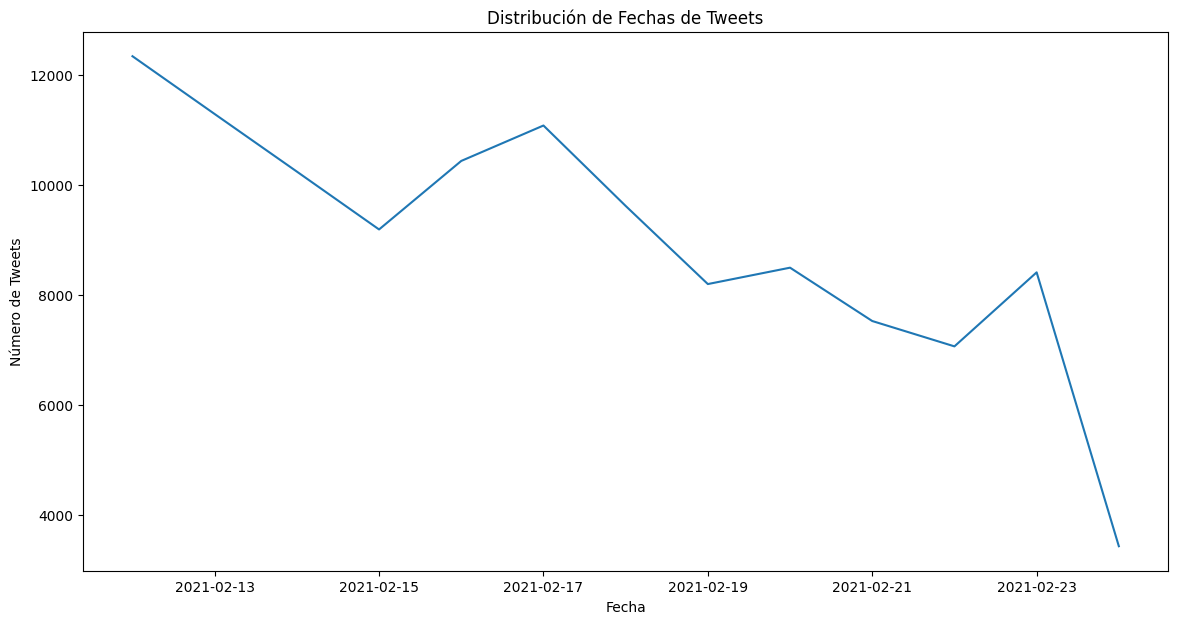

In [7]:
# Distribución de Fechas de Tweets
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(14, 7))
df['date'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title('Distribución de Fechas de Tweets')
plt.xlabel('Fecha')
plt.ylabel('Número de Tweets')
plt.show()

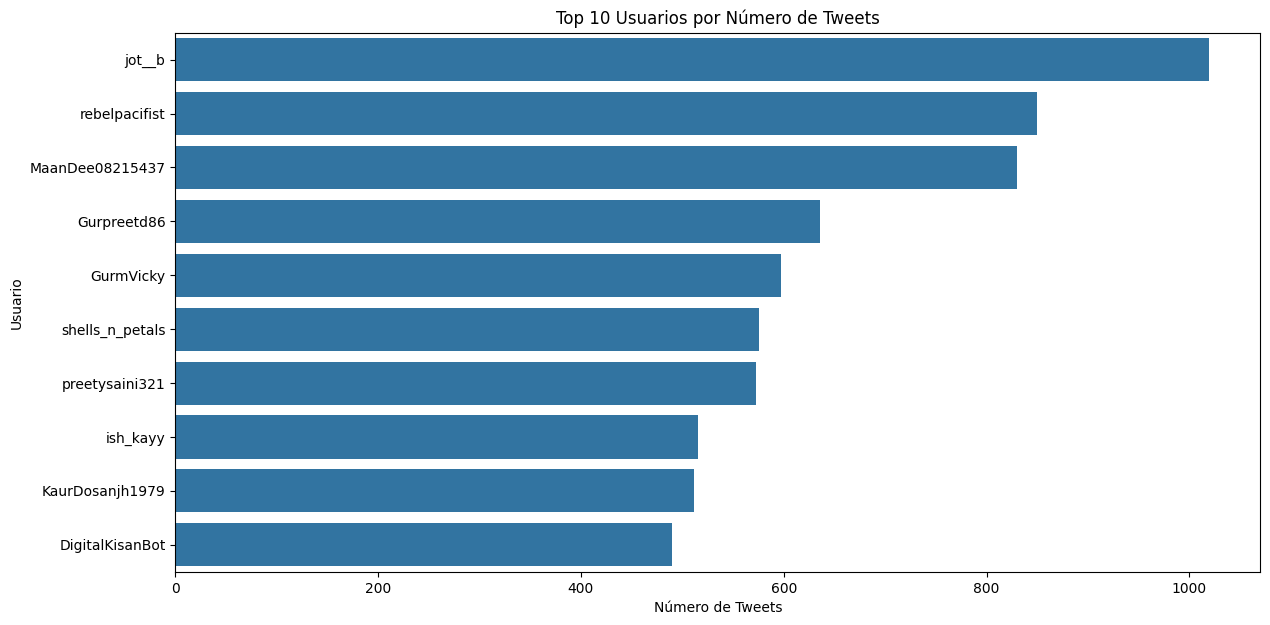

In [8]:
# Ajustar el análisis de los usuarios según la estructura observada
# Suponiendo que la columna correcta es 'user.username'
if 'user.username' in df.columns:
    top_users = df['user.username'].value_counts().head(10)
    plt.figure(figsize=(14, 7))
    sns.barplot(x=top_users.values, y=top_users.index)
    plt.title('Top 10 Usuarios por Número de Tweets')
    plt.xlabel('Número de Tweets')
    plt.ylabel('Usuario')
    plt.show()
else:
    print("La columna 'user.username' no se encuentra en el DataFrame.")

/home/checho/Repos/latam-data-engineer-challenge/velatam/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128591 (\N{PERSON WITH FOLDED HANDS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/checho/Repos/latam-data-engineer-challenge/velatam/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128668 (\N{TRACTOR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/checho/Repos/latam-data-engineer-challenge/velatam/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9994 (\N{RAISED FIST}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/checho/Repos/latam-data-engineer-challenge/velatam/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/checho/Repos/latam-data-engineer-ch

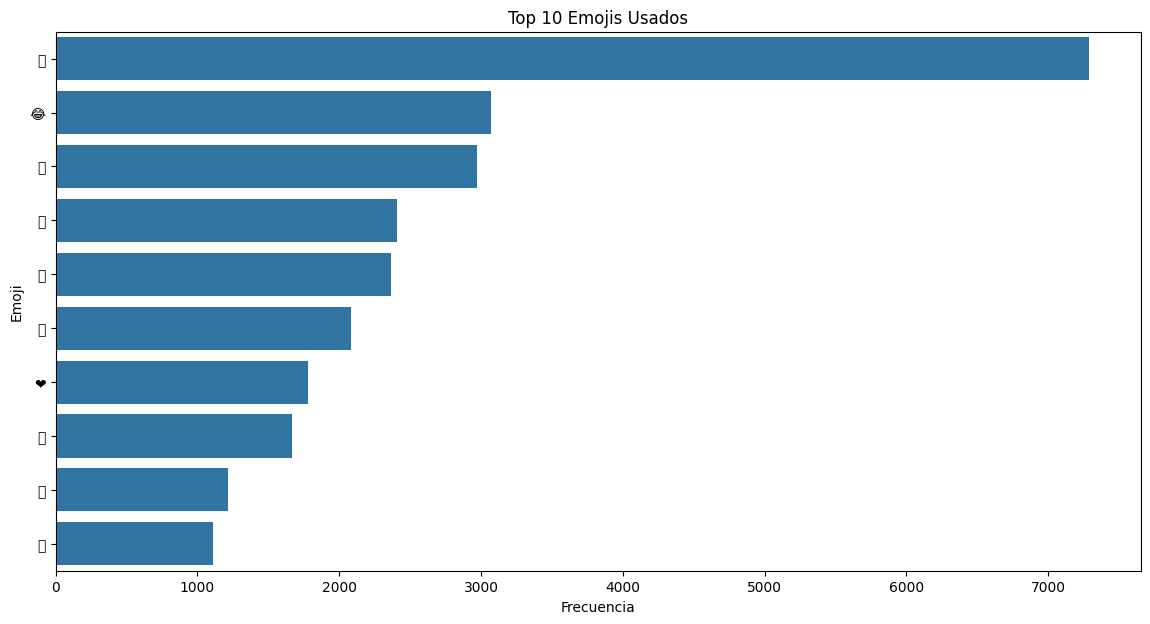

In [9]:
# Distribución de Emojis
def extract_emojis(s):
    return ''.join(c for c in s if c in emoji.EMOJI_DATA)

df['emojis'] = df['content'].apply(extract_emojis)
all_emojis = ''.join(df['emojis'].values)
emoji_freq = pd.Series(list(all_emojis)).value_counts().head(10)

# Configurar la fuente para los gráficos
plt.rcParams['font.family'] = 'DejaVu Sans'  # Intentar usar una fuente estándar que soporte la mayoría de los emojis

# Ignorar advertencias de fuentes faltantes
warnings.filterwarnings('ignore', message="Glyph .* missing from current font")

plt.figure(figsize=(14, 7))
sns.barplot(x=emoji_freq.values, y=emoji_freq.index)
plt.title('Top 10 Emojis Usados')
plt.xlabel('Frecuencia')
plt.ylabel('Emoji')
plt.show()

## Challenge Parte 1: Las top 10 fechas donde hay más tweets.
Las top 10 fechas donde hay más tweets. Menciona el usuario que más publicaciones tiene por cada uno de esos días.

### 1.1. Función Optimizada para Tiempo
Explicación y código de la función optimizada para tiempo.

In [12]:
def q1_time(file_path: str) -> List[Tuple[datetime.date, str]]:
    """
    Función que retorna las top 10 fechas con más tweets y el usuario con más publicaciones por cada día.
    Optimizada para tiempo de ejecución.
    
    :param file_path: Ubicación del archivo con los tweets a procesar.
    :return: Lista de tuplas con la fecha y el usuario con más publicaciones en esa fecha.
    """
    try:
        # Cargar el DataFrame desde el archivo JSON
        data = []
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                try:
                    data.append(json.loads(line))
                except json.JSONDecodeError as e:
                    print(f"Error al decodificar la línea: {e}")
        
        if not data:
            raise ValueError("El archivo está vacío o no contiene datos válidos.")
        
        df = pd.json_normalize(data)
        
        if 'date' not in df.columns or 'user.username' not in df.columns:
            raise KeyError("El DataFrame no contiene las columnas 'date' o 'user.username'.")
        
        # Procesamiento
        df['date'] = pd.to_datetime(df['date'])
        top_dates = df['date'].dt.date.value_counts().head(10)
        
        result = []
        for date, count in top_dates.items():
            daily_tweets = df[df['date'].dt.date == date]
            top_user = daily_tweets['user.username'].value_counts().idxmax()
            result.append((date, top_user))
        
        return result
    
    except FileNotFoundError:
        print(f"El archivo '{file_path}' no se encontró.")
    except Exception as e:
        print(f"Se produjo un error inesperado: {e}")
    return []



In [13]:
# Probar la función
file_path = '../data/farmers-protest-tweets-2021-2-4.json'
top_dates_users_time = q1_time(file_path)
print(top_dates_users_time)


[(datetime.date(2021, 2, 12), 'RanbirS00614606'), (datetime.date(2021, 2, 13), 'MaanDee08215437'), (datetime.date(2021, 2, 17), 'RaaJVinderkaur'), (datetime.date(2021, 2, 16), 'jot__b'), (datetime.date(2021, 2, 14), 'rebelpacifist'), (datetime.date(2021, 2, 18), 'neetuanjle_nitu'), (datetime.date(2021, 2, 15), 'jot__b'), (datetime.date(2021, 2, 20), 'MangalJ23056160'), (datetime.date(2021, 2, 23), 'Surrypuria'), (datetime.date(2021, 2, 19), 'Preetm91')]


### 1.2. Función Optimizada para Memoria
Explicación y código de la función optimizada para memoria.

In [14]:
def q1_memory(file_path: str) -> List[Tuple[datetime.date, str]]:
    """
    Función que retorna las top 10 fechas con más tweets y el usuario con más publicaciones por cada día.
    Optimizada para uso de memoria.
    
    :param file_path: Ubicación del archivo con los tweets a procesar.
    :return: Lista de tuplas con la fecha y el usuario con más publicaciones en esa fecha.
    """
    try:
        data = []
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                try:
                    data.append(json.loads(line))
                except json.JSONDecodeError as e:
                    print(f"Error al decodificar la línea: {e}")
        
        if not data:
            raise ValueError("El archivo está vacío o no contiene datos válidos.")
        
        df = pd.json_normalize(data)
        
        if 'date' not in df.columns or 'user.username' not in df.columns:
            raise KeyError("El DataFrame no contiene las columnas 'date' o 'user.username'.")
        
        # Procesamiento
        date_counts = Counter()
        user_counts_by_date = defaultdict(Counter)
        
        for _, row in df.iterrows():
            try:
                tweet_date = pd.to_datetime(row['date']).date()
                username = row['user.username']
                date_counts[tweet_date] += 1
                user_counts_by_date[tweet_date][username] += 1
            except Exception as e:
                print(f"Error al procesar la fila: {e}")
        
        top_dates = date_counts.most_common(10)
        
        result = []
        for date, count in top_dates:
            top_user = user_counts_by_date[date].most_common(1)[0][0]
            result.append((date, top_user))
        
        return result
    
    except FileNotFoundError:
        print(f"El archivo '{file_path}' no se encontró.")
    except Exception as e:
        print(f"Se produjo un error inesperado: {e}")
    return []

In [15]:
# Probar la función
file_path = '../data/farmers-protest-tweets-2021-2-4.json'
top_dates_users_memory = q1_memory(file_path)
print(top_dates_users_memory)

[(datetime.date(2021, 2, 12), 'RanbirS00614606'), (datetime.date(2021, 2, 13), 'MaanDee08215437'), (datetime.date(2021, 2, 17), 'RaaJVinderkaur'), (datetime.date(2021, 2, 16), 'jot__b'), (datetime.date(2021, 2, 14), 'rebelpacifist'), (datetime.date(2021, 2, 18), 'neetuanjle_nitu'), (datetime.date(2021, 2, 15), 'jot__b'), (datetime.date(2021, 2, 20), 'MangalJ23056160'), (datetime.date(2021, 2, 23), 'Surrypuria'), (datetime.date(2021, 2, 19), 'Preetm91')]


## Medición de Rendimiento

### 1.A. Tiempo de Ejecución

In [16]:
import time
file_path = '../data/farmers-protest-tweets-2021-2-4.json'

# Medir el tiempo de ejecución para q1_time
start_time = time.time()
top_dates_users_time = q1_time(file_path)
end_time = time.time()
print(f"q1_time ejecutado en {end_time - start_time} segundos")

# Medir el tiempo de ejecución para q1_memory
start_time = time.time()
top_dates_users_memory = q1_memory(file_path)
end_time = time.time()
print(f"q1_memory ejecutado en {end_time - start_time} segundos")


q1_time ejecutado en 9.656919002532959 segundos
q1_memory ejecutado en 46.98621916770935 segundos


### 1.B. Uso de Memoria

In [17]:
import tracemalloc
file_path = '../data/farmers-protest-tweets-2021-2-4.json'

def measure_memory_tracemalloc(func, *args):
    tracemalloc.start()
    func(*args)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return current / 10**6, peak / 10**6  # Convertir a MiB

# Medir el uso de memoria para q1_time
current_mem_time, peak_mem_time = measure_memory_tracemalloc(q1_time, file_path)
print(f"q1_time uso de memoria actual: {current_mem_time} MiB, uso máximo: {peak_mem_time} MiB")

# Medir el uso de memoria para q1_memory
current_mem_memory, peak_mem_memory = measure_memory_tracemalloc(q1_memory, file_path)
print(f"q1_memory uso de memoria actual: {current_mem_memory} MiB, uso máximo: {peak_mem_memory} MiB")


q1_time uso de memoria actual: 0.985262 MiB, uso máximo: 2173.91663 MiB
q1_memory uso de memoria actual: 0.047398 MiB, uso máximo: 2173.907505 MiB


## Challenge Parte 2: Top 10 Emojis Más Usados
Los top 10 emojis más usados con su respectivo conteo.

### 2.1. Función Optimizada para Tiempo
Explicación y código de la función optimizada para tiempo.

In [18]:
def q2_time(file_path: str) -> List[Tuple[str, int]]:
    """
    Función que retorna los top 10 emojis más usados con su respectivo conteo.
    Optimizada para tiempo de ejecución.
    
    :param file_path: Ubicación del archivo con los tweets a procesar.
    :return: Lista de tuplas con el emoji y su respectivo conteo.
    """
    try:
        # Cargar el DataFrame desde el archivo JSON
        data = []
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                try:
                    data.append(json.loads(line))
                except json.JSONDecodeError as e:
                    print(f"Error al decodificar la línea: {e}")
        
        if not data:
            raise ValueError("El archivo está vacío o no contiene datos válidos.")
        
        df = pd.json_normalize(data)
        
        if 'content' not in df.columns:
            raise KeyError("El DataFrame no contiene la columna 'content'.")
        
        # Función para extraer emojis
        def extract_emojis(s):
            return ''.join(c for c in s if c in emoji.EMOJI_DATA)
    
        # Extraer emojis de la columna 'content'
        df['emojis'] = df['content'].apply(lambda x: extract_emojis(x) if x else '')
        
        # Contar la frecuencia de los emojis
        all_emojis = ''.join(df['emojis'].values)
        emoji_freq = Counter(all_emojis)
        
        # Obtener los top 10 emojis
        top_10_emojis = emoji_freq.most_common(10)
        
        return top_10_emojis

    except FileNotFoundError:
        print(f"El archivo '{file_path}' no se encontró.")
    except Exception as e:
        print(f"Se produjo un error inesperado: {e}")
    return []


In [19]:
# Probar la función
file_path = '../data/farmers-protest-tweets-2021-2-4.json'
top_ten_emojis_time = q2_time(file_path)
print(top_ten_emojis_time)


[('🙏', 7286), ('😂', 3072), ('🚜', 2972), ('✊', 2411), ('🌾', 2363), ('🏻', 2080), ('❤', 1779), ('🤣', 1668), ('🏽', 1218), ('👇', 1108)]


### 2.2. Función Optimizada para Memoria
Explicación y código de la función optimizada para memoria.

In [22]:
def q2_memory(file_path: str) -> List[Tuple[str, int]]:
    """
    Función que retorna los top 10 emojis más usados con su respectivo conteo.
    Optimizada para uso de memoria.
    
    :param file_path: Ubicación del archivo con los tweets a procesar.
    :return: Lista de tuplas con el emoji y su respectivo conteo.
    """
    try:
        # Cargar el DataFrame desde el archivo JSON
        data = []
        with open(file_path, 'r', encoding='utf-8') as f:
            for line in f:
                try:
                    data.append(json.loads(line))
                except json.JSONDecodeError as e:
                    print(f"Error al decodificar la línea: {e}")
        
        if not data:
            raise ValueError("El archivo está vacío o no contiene datos válidos.")
        
        df = pd.json_normalize(data)
        
        if 'content' not in df.columns:
            raise KeyError("El DataFrame no contiene la columna 'content'.")
        
        # Función para extraer emojis
        def extract_emojis(s):
            return ''.join(c for c in s if c in emoji.EMOJI_DATA)
        
        # Extraer emojis de la columna 'content' usando generador
        emoji_counter = Counter()
        for content in df['content']:
            if content is not None:
                emojis = extract_emojis(content)
                emoji_counter.update(emojis)
        
        # Obtener los top 10 emojis
        top_10_emojis = emoji_counter.most_common(10)
        
        return top_10_emojis

    except FileNotFoundError:
        print(f"El archivo '{file_path}' no se encontró.")
    except Exception as e:
        print(f"Se produjo un error inesperado: {e}")
    return []


In [23]:
# Probar la función
file_path = '../data/farmers-protest-tweets-2021-2-4.json'
top_ten_emojis_memory = q2_memory(file_path)
print(top_ten_emojis_memory)

[('🙏', 7286), ('😂', 3072), ('🚜', 2972), ('✊', 2411), ('🌾', 2363), ('🏻', 2080), ('❤', 1779), ('🤣', 1668), ('🏽', 1218), ('👇', 1108)]


## Medición de Rendimiento

### 2.A. Tiempo de Ejecución

In [24]:
import time
import cProfile
import pstats

file_path = '../data/farmers-protest-tweets-2021-2-4.json'

# Medir el tiempo de ejecución para q2_time
start_time = time.time()
profiler = cProfile.Profile()
profiler.enable()
top_emojis_time = q2_time(file_path)
profiler.disable()
end_time = time.time()
print(f"q2_time ejecutado en {end_time - start_time} segundos")
stats = pstats.Stats(profiler).sort_stats('time')
stats.print_stats()

# Medir el tiempo de ejecución para q2_memory
start_time = time.time()
profiler = cProfile.Profile()
profiler.enable()
top_emojis_memory = q2_memory(file_path)
profiler.disable()
end_time = time.time()
print(f"q2_memory ejecutado en {end_time - start_time} segundos")
stats = pstats.Stats(profiler).sort_stats('time')
stats.print_stats()


q2_time ejecutado en 12.152549743652344 segundos
         17454523 function calls (12937963 primitive calls) in 11.647 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   117407    2.940    0.000    2.960    0.000 /usr/lib/python3.10/json/decoder.py:343(raw_decode)
4516381/117407    2.389    0.000    2.948    0.000 /home/checho/Repos/latam-data-engineer-challenge/velatam/lib/python3.10/site-packages/pandas/io/json/_normalize.py:126(_normalise_json)
   163043    1.006    0.000    1.006    0.000 /tmp/ipykernel_2812920/3019471978.py:29(<genexpr>)
   117407    0.789    0.000    3.849    0.000 /usr/lib/python3.10/json/decoder.py:332(decode)
      164    0.622    0.004    0.630    0.004 /home/checho/Repos/latam-data-engineer-challenge/velatam/lib/python3.10/site-packages/pandas/core/internals/construction.py:1028(convert)
  9688652    0.588    0.000    0.588    0.000 {built-in method builtins.isinstance}
        1    0.476    0.47

### 2.B. Uso de Memoria

In [25]:
from memory_profiler import memory_usage

def measure_memory(func, *args):
    mem_usage = memory_usage((func, args), interval=0.1)
    return max(mem_usage) - min(mem_usage)

file_path = '../data/farmers-protest-tweets-2021-2-4.json'

# Medir el uso de memoria para q2_time
mem_usage_time = measure_memory(q2_time, file_path)
print(f"q2_time uso de memoria: {mem_usage_time} MiB")

# Medir el uso de memoria para q2_memory
mem_usage_memory = measure_memory(q2_memory, file_path)
print(f"q2_memory uso de memoria: {mem_usage_memory} MiB")


q2_time uso de memoria: 989.875 MiB
q2_memory uso de memoria: 966.125 MiB


## Challenge Parte 3: Top 10 de Usuarios más Influyentes
El top 10 histórico de usuarios más influyentes en función del conteo de las menciones (@) que registra cada uno de ellos.

### 3.1. Función Optimizada para Tiempo
Explicación y código de la función optimizada para tiempo.

In [ ]:
def q3_time(file_path: str) -> List[Tuple[str, int]]:
    """
    Función que retorna las top 10 usuarios más influyentes en función del conteo de las menciones (@) que registra.
    Optimizada para tiempo de ejecución.
    
    :param file_path: Ubicación del archivo con los tweets a procesar.
    :return: Lista de tuplas con el usuario y su respectivo conteo.
    """
    mention_pattern = re.compile(r'@\w+')
    mentions = []

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            tweet = json.loads(line)
            content = tweet.get('content', '')
            mentions.extend(mention_pattern.findall(content))
    
    mention_counts = Counter(mentions)
    top_mentions = mention_counts.most_common(10)
    return [(mention[1:], count) for mention, count in top_mentions]  # Remove '@' from username


In [ ]:
# Probar la función
file_path = '../data/farmers-protest-tweets-2021-2-4.json'
top_ten_influyente_time = q3_time(file_path)
print(top_ten_influyente_time)

### 3.2. Función Optimizada para Memoria
Explicación y código de la función optimizada para memoria.

In [ ]:
def q3_memory(file_path: str) -> List[Tuple[str, int]]:
    """
    Función que retorna las top 10 usuarios más influyentes en función del conteo de las menciones (@) que registra.
    Optimizada para uso de memoria.
    
    :param file_path: Ubicación del archivo con los tweets a procesar.
    :return: Lista de tuplas con el usuario y su respectivo conteo.
    """
    mention_pattern = re.compile(r'@\w+')
    mention_counts = Counter()

    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            tweet = json.loads(line)
            content = tweet.get('content', '')
            mentions = mention_pattern.findall(content)
            mention_counts.update(mentions)
    
    top_mentions = mention_counts.most_common(10)
    return [(mention[1:], count) for mention, count in top_mentions]  # Remove '@' from username


In [ ]:
# Probar la función
file_path = '../data/farmers-protest-tweets-2021-2-4.json'
top_ten_influyente_memory = q3_time(file_path)
print(top_ten_influyente_memory)

## Medición de Rendimiento

### 3.A. Tiempo de Ejecución

In [ ]:
import time
import cProfile
import pstats

# Medir el tiempo de ejecución para q3_time
start_time = time.time()
profiler = cProfile.Profile()
profiler.enable()
top_influential_users_time = q3_time(file_path)
profiler.disable()
end_time = time.time()
print(f"q3_time ejecutado en {end_time - start_time} segundos")
stats = pstats.Stats(profiler).sort_stats('time')
stats.print_stats()

# Medir el tiempo de ejecución para q3_memory
start_time = time.time()
profiler = cProfile.Profile()
profiler.enable()
top_influential_users_memory = q3_memory(file_path)
profiler.disable()
end_time = time.time()
print(f"q3_memory ejecutado en {end_time - start_time} segundos")
stats = pstats.Stats(profiler).sort_stats('time')
stats.print_stats()

### 3.B. Uso de Memoria

In [ ]:
from memory_profiler import memory_usage

def measure_memory(func, *args):
    mem_usage = memory_usage((func, args), interval=0.1)
    return max(mem_usage) - min(mem_usage)

file_path = '../data/farmers-protest-tweets-2021-2-4.json'

# Medir el uso de memoria para q3_time
mem_usage_time = memory_usage((q3_time, (file_path,)), max_usage=True)
print(f"q3_time uso de memoria: {mem_usage_time} MiB")

# Medir el uso de memoria para q3_memory
mem_usage_memory = memory_usage((q3_memory, (file_path,)), max_usage=True)
print(f"q3_memory uso de memoria: {mem_usage_memory} MiB")
